### Import Python libraries

In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import scale 
from sklearn import cross_validation 
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.metrics import mean_squared_error

/Users/emilyhahn/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load and preprocess data

In [2]:
### Import data ###
df=pd.DataFrame.from_csv('INCA_data.csv')

### Scale IN vals and static vars
for column in df:
    df[column]=scale(df[column])
        
### Set static variables ###
static_vars = df.iloc[:,8:]

### Parse IN values to test independently to prevent covariance
V_cov = [df[['V_m']], df[['V_b']], df[['V_b']], df[['V_err']], df[['V_acc']]]
A_cov = [df[['A_m']], df[['A_b']], df[['A_b']], df[['A_err']], df[['A_acc']]] 

/Users/emilyhahn/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


### Initialize LASSO functions

In [3]:
def lasso(X,y):
    
    # Generate alphas
    alphas = 10**np.linspace(1,-2,36)*0.5

    # Split train and test data
    X_train, X_test , y_train, y_test = \
    cross_validation.train_test_split(X, y, test_size=.5, random_state=None) 

    # Train and plot lasso model
    lasso = Lasso(max_iter=10000) 
    coefs = [] 

    for a in alphas: 
        lasso.set_params(alpha=a) 
        lasso.fit(X_train, y_train)
        coefs.append(lasso.coef_)

    ax = plt.gca()
    ax.plot(alphas, coefs)
    ax.set_xscale('log')   
    plt.axis('tight') 
    plt.xlabel(r'alpha $\alpha$') 
    plt.ylabel('weights (coefs)')
    plt.title('y = %s | x = static_vars + %s' % (y.name,X.columns[0]))
    ax.legend(labels=pd.Series(X.columns), \
              loc=0, bbox_to_anchor=(1.3, .75)) 
    plt.show()

    # Choose the best alpha using cross validation (CV)
    lassocv = LassoCV(cv=18, max_iter=100000) 
    params = lassocv.fit(X_train, y_train)

    # Refit lasso model
    ref_lasso_cv = lasso.set_params(alpha=lassocv.alpha_) 
    ref_params = lasso.fit(X_train, y_train) 

    # Compute error
    mse = mean_squared_error(y_test, lasso.predict(X_test))

    # CV alpha
    cv_alpha = lassocv.alpha_
    print('MSE: %f \n\nCV alpha: %f \n\nCV params: \n\n%s\n' % (mse, cv_alpha, params))

    # Sparse coef estimates
    sce = pd.Series(lasso.coef_, index=X.columns)
    print('lasso sparse coefficient estimates: \n%s' % sce) 
    
    return

In [4]:
def lasso_IN(X_group,y_predictor,static_vars):
    for var in X_group:
        y_var = y_predictor
        X_var = pd.concat([var,static_vars], axis=1)
        lasso(X_var,y_var)
    return

### Independly test IN values - valence, arousal

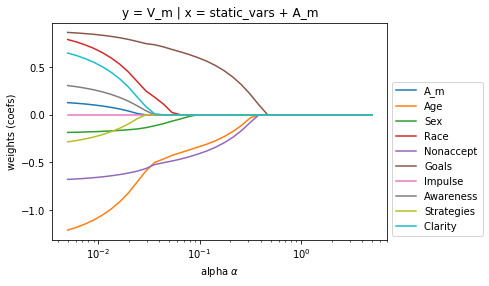

MSE: 2.070273 

CV alpha: 0.100695 

CV params: 

LassoCV(alphas=None, copy_X=True, cv=18, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

lasso sparse coefficient estimates: 
A_m           0.000000
Age          -0.332395
Sex          -0.000000
Race          0.000000
Nonaccept    -0.405722
Goals         0.592778
Impulse      -0.000000
Awareness    -0.000000
Strategies    0.000000
Clarity      -0.000000
dtype: float64


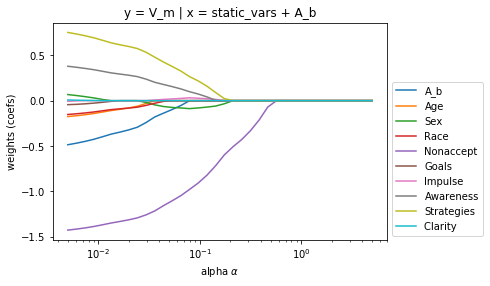

MSE: 1.471977 

CV alpha: 0.236258 

CV params: 

LassoCV(alphas=None, copy_X=True, cv=18, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

lasso sparse coefficient estimates: 
A_b          -0.000000
Age          -0.000000
Sex          -0.000000
Race          0.000000
Nonaccept    -0.467701
Goals         0.000000
Impulse       0.000000
Awareness     0.000000
Strategies    0.000000
Clarity       0.000000
dtype: float64


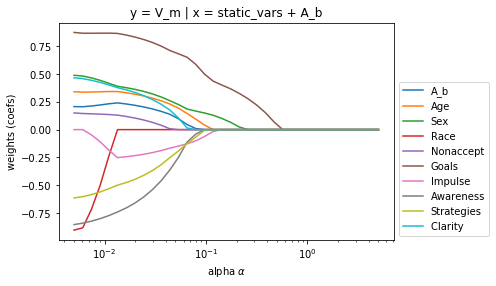

MSE: 1.018970 

CV alpha: 0.286804 

CV params: 

LassoCV(alphas=None, copy_X=True, cv=18, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

lasso sparse coefficient estimates: 
A_b           0.000000
Age           0.000000
Sex           0.000000
Race         -0.000000
Nonaccept    -0.000000
Goals         0.250175
Impulse      -0.000000
Awareness    -0.000000
Strategies   -0.000000
Clarity       0.000000
dtype: float64


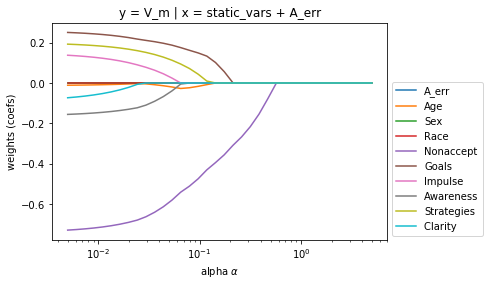

MSE: 1.547075 

CV alpha: 0.169817 

CV params: 

LassoCV(alphas=None, copy_X=True, cv=18, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

lasso sparse coefficient estimates: 
A_err        -0.000000
Age          -0.000000
Sex           0.000000
Race          0.000000
Nonaccept    -0.362129
Goals         0.063169
Impulse       0.000000
Awareness    -0.000000
Strategies    0.000000
Clarity      -0.000000
dtype: float64


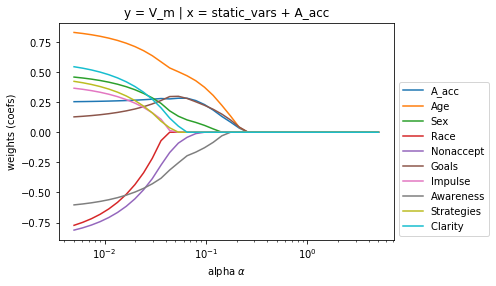

MSE: 0.985450 

CV alpha: 0.254815 

CV params: 

LassoCV(alphas=None, copy_X=True, cv=18, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

lasso sparse coefficient estimates: 
A_acc         0.000000e+00
Age           0.000000e+00
Sex           0.000000e+00
Race         -0.000000e+00
Nonaccept    -0.000000e+00
Goals         3.852335e-17
Impulse      -0.000000e+00
Awareness    -0.000000e+00
Strategies    0.000000e+00
Clarity       0.000000e+00
dtype: float64


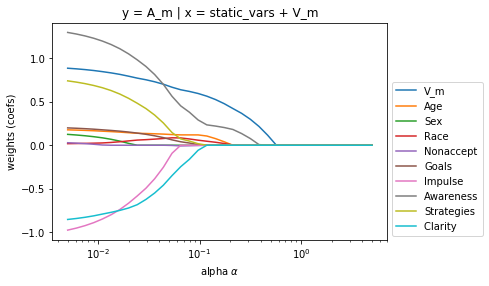

MSE: 0.680819 

CV alpha: 0.261431 

CV params: 

LassoCV(alphas=None, copy_X=True, cv=18, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

lasso sparse coefficient estimates: 
V_m           0.362915
Age           0.000000
Sex          -0.000000
Race          0.000000
Nonaccept    -0.000000
Goals         0.000000
Impulse       0.000000
Awareness     0.131518
Strategies    0.000000
Clarity       0.000000
dtype: float64


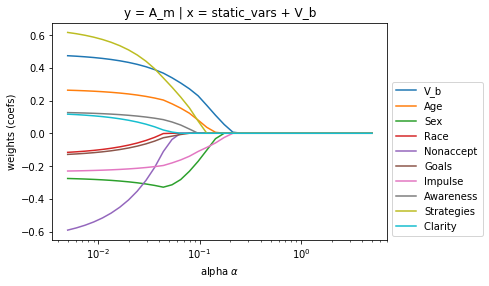

MSE: 1.466921 

CV alpha: 0.218398 

CV params: 

LassoCV(alphas=None, copy_X=True, cv=18, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

lasso sparse coefficient estimates: 
V_b           0.0
Age           0.0
Sex          -0.0
Race         -0.0
Nonaccept    -0.0
Goals        -0.0
Impulse      -0.0
Awareness     0.0
Strategies    0.0
Clarity       0.0
dtype: float64


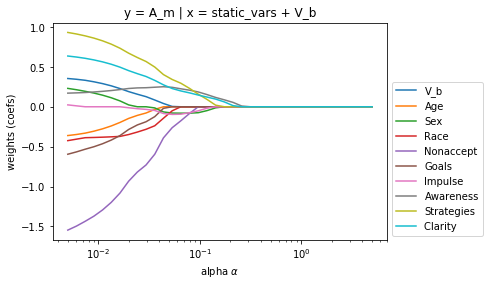

MSE: 1.333725 

CV alpha: 0.267871 

CV params: 

LassoCV(alphas=None, copy_X=True, cv=18, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

lasso sparse coefficient estimates: 
V_b          -0.0
Age           0.0
Sex          -0.0
Race         -0.0
Nonaccept    -0.0
Goals        -0.0
Impulse      -0.0
Awareness     0.0
Strategies    0.0
Clarity       0.0
dtype: float64


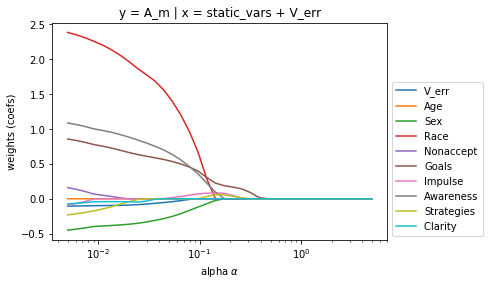

MSE: 0.612644 

CV alpha: 0.401507 

CV params: 

LassoCV(alphas=None, copy_X=True, cv=18, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

lasso sparse coefficient estimates: 
V_err        -0.0
Age          -0.0
Sex          -0.0
Race          0.0
Nonaccept     0.0
Goals         0.0
Impulse       0.0
Awareness     0.0
Strategies    0.0
Clarity       0.0
dtype: float64


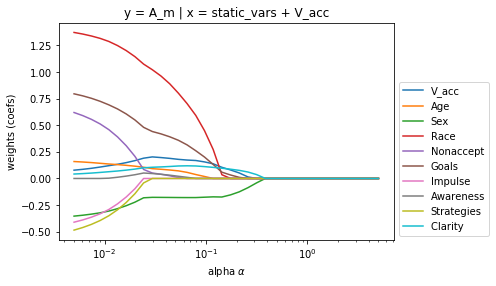

MSE: 0.671689 

CV alpha: 0.384842 

CV params: 

LassoCV(alphas=None, copy_X=True, cv=18, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

lasso sparse coefficient estimates: 
V_acc         0.0
Age           0.0
Sex          -0.0
Race          0.0
Nonaccept     0.0
Goals         0.0
Impulse       0.0
Awareness     0.0
Strategies    0.0
Clarity       0.0
dtype: float64


In [5]:
### valence | IN fMRI values (SVM output) vs cog-behav variables
lasso_IN(A_cov,df['V_m'],static_vars)

### arousal | IN fMRI values (SVM output) vs cog-behav variables
lasso_IN(V_cov,df['A_m'],static_vars)